# Aprendizado Profundo - Introdução ao Aprendizado de Máquina

- Neste notebook, iremos rever conceitos importantes referentes à Aprendizagem de Máquina, como problemas de regressão vs. classificação, divisão dos dados em conjuntos de treino, validação e teste e avaliação dos modelos utilizados (métricas de precisão e revocação, por exemplo). Iremos utilizar basicamente dois *toy-datasets* que podem ser encontrados na documentação da biblioteca `scikit-learn`, sendo eles a base de dados [Iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris), para classificação, e de [Diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes), para regressão.

## 1. Conjunto de Exercícios - Carregamento das bases de dados

- Para começarmos a revisão de aprendizagem de máquina, primeiro devemos ser capazes de carregar as bases de dados em memória. Iremos definir em detalhes um *pipeline* de processamento completo, ou seja, desde o carregamento dos dados até o treinamento dos modelos, para a base de dados Iris, e a sua tarefa, posteriormente, será de replicar as mesmas ideias para a base de dados de Diabetes.



In [1]:
# Importando as funções para carregar os dados em memória
from sklearn.datasets import load_iris, load_diabetes

In [2]:
# Podemos brincar com alguns parâmetros presentes na documentação.
# Aqui, iremos carregar os dados como tabelas Pandas, apenas para uma visualização mais limpa.

X, y = load_iris(return_X_y=True, as_frame=True)

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


## 2. Conjunto de Exercícios - Divisão entre treino/validação/teste

- Como visto em sala de aula, tipicamente separamos os dados em 3 conjuntos: Treino, Validação e Teste, onde cada um deles possuem um propósito específico, como podemos ver a seguir:
    - **Treino:** Como o nome diz, esse conjunto dos dados serve para treinarmos os nossos modelos. Em outras palavras, encontrar os pesos dos nossos modelos que minimizam um certo erro;

    - **Validação:** Como o nome diz, esse conjunto dos dados serve para validarmos os nossos modelos. Tipicamente, quando trabalhamos com aprendizagem de máquina, temos diversos modelos com hiperparâmetros que devemos otimizar de acordo com os nossos dados, como por exemplo: a profundidade de uma árvore, o número de vizinhos de um KNN, entre outros. Para isso, utilizamos o conjunto de validação para verificar qual variação dos hiperparâmetros do nosso modelo é a mais promissora;
    
    - **Teste:** O conjunto de teste é o conjunto que não iremos utilizar nem durante o treinamento nem durante a a validação do nosso modelo. O intuito desse conjunto de dados é representar dados novos, que o nosso modelo não viu ainda, a fim de mensurar a qualidade das nossas predições em dados reais.

1. Utilizando a função [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), divida os dados carregados anteriormente em dois conjunos: treino e teste. Posteriormente, iremos definir o conjunto de validação utilizando validação cruzada em N-Folds, durante o treinamento dos nossos modelo.

**Dica:** Após implementar o treinamento dos modelos, volte nessa célula e brinque com a porcentagem dos dados que serão destinados para o conjunto de treino e teste. Além disso, para fins de reprodutibilidade, sugerimos que você defina um `random_state`, para evitar eventuais dores de cabeça com resultados inconsistentes.
- Uma outra dica útil é realizar um `shuffle` durante a divisão dos dados, já que as *labels* nessa base de dados estão agrupadas, introduzindo assim um potencial desbalanceamento de classes nos conjuntos. Leia a documentação da função para obter mais informações sobre como realizar esse `shuffle`.

In [5]:
from sklearn.model_selection import train_test_split

# Convertendo os valores para matrizes e vetores numpy
X = X.values
y = y.values

# Implemente a sua solução aqui
X_train, X_teste, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


2. Implemente também uma visualização da distribuição das classes nos dois conjuntos de dados através de gráficos de barra, utilizando a biblioteca `matplotlib`.

**Dica:** Utilize a classe `Counter` do módulo `collections`, nativo do Python, para contar quantas classes temos nas anotações de cada conjunto.

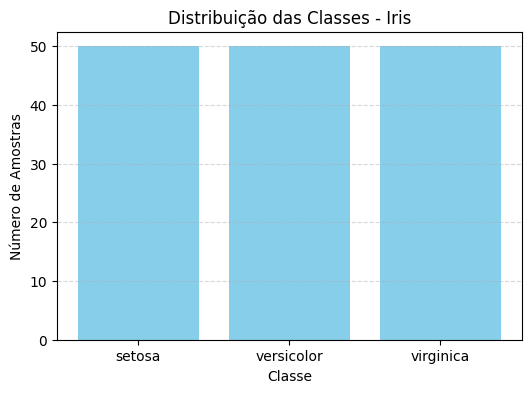

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

# Função auxiliar para ordenar um dicionário baseado nas chaves (caso precise)
def sort_dict(d):
    return {key: d[key] for key in sorted(d)}

# Implemente a sua solução aqui
contagem_iris = Counter(y)

plt.figure(figsize=(6, 4))
plt.bar(contagem_iris.keys(), contagem_iris.values(), color='skyblue')
plt.xticks(ticks=[0, 1, 2], labels=['setosa', 'versicolor', 'virginica'])
plt.title('Distribuição das Classes - Iris')
plt.xlabel('Classe')
plt.ylabel('Número de Amostras')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

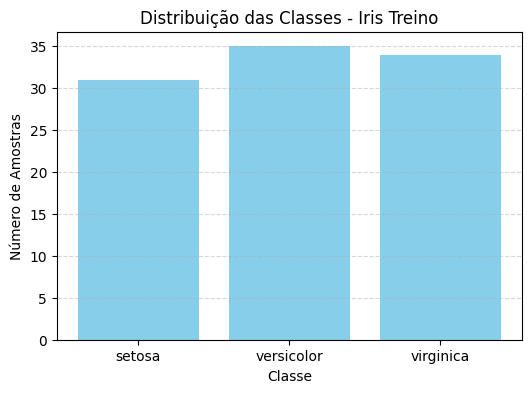

In [7]:
contagem_iris = Counter(y_train)

plt.figure(figsize=(6, 4))
plt.bar(contagem_iris.keys(), contagem_iris.values(), color='skyblue')
plt.xticks(ticks=[0, 1, 2], labels=['setosa', 'versicolor', 'virginica'])
plt.title('Distribuição das Classes - Iris Treino')
plt.xlabel('Classe')
plt.ylabel('Número de Amostras')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## 3. Conjunto de Exercícios - Treinamento dos modelos

- Como mencionado anteriormente, durante o treinamento dos modelos iremos utilizar uma validação cruzada com N-Folds. Além disso, iremos explorar 3 modelos clássicos durante os nossos exercícios, sendo eles: (i) Naive Bayes, que servirá como *baseline* para comparações futuras; (ii) árvores de decisão, podendo ficar livre para explorar "variantes" *ensemble* como no caso de modelos de *bagging* e *boosting*; e finalmente (iii) K-Nearest Neighbors.

In [8]:
# Definindo todos os imports necessários para esse conjunto de exercícios
# Caso necessário, inclua outros imports (principalmente se quiserem trabalhar com outros modelos)
from sklearn.model_selection import KFold

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

1. Instancie um objeto da classe `KFold`, passando o número de *folds* que deseja utilizar durante o processo de validação cruzada (sugerimos um valor de 5 *folds*, mas fique a vontade para testar outros valores).

**Dica:** A mesma dica de definir um `random_state` se aplica também durante a definição do seu objeto da classe `KFold` se desejar habilitar a opção de `shuffle` da classe.

In [9]:
# Implemente a sua solução aqui
kf = KFold(n_splits=5, shuffle=True, random_state=42)

2. Treine o modelo Naive Bayes utilizando os dados de treino para realizar o loop de validação cruzada. Como o modelo a ser utilizado não possui hiperparâmetros, ele servirá como um ótimo *baseline* para o nosso problema.

**Dica:** Para mensurar a qualidade do seu modelo, utilize as métricas: acurácia, revocação e precisão. A biblioteca `sklearn` implementa tais funções, mas, caso queira, sinta-se a vontade para implementar as suas próprias funções para tais métricas.

In [10]:
# Caso queira utilizar as implementações padrões da biblioteca para as métricas
# Caso for utilizar precision e recall_score, lembre-se de definir o parâmetro 'average' para None. Dessa forma,
# as métricas serão calculadas para cada classe, ao invés de realizarmos algum tipo de sumarização.
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

- Utilize o seguinte trecho de código para implementar a validação cruzada utilizando N-Folds. Você pode utilizar `train_index` e `validation_index` para indexar as variáveis `X_train` e `y_train` para obter os conjuntos de treino e validação, respectivamente, da sua validação cruzada!

```python
# kf é um objeto da classe KFold
for i, (train_index, validation_index) in enumerate(kf.split(X_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Validation:  index={validation_index}")
```



In [11]:
# Implemente a sua solução aqui
import numpy as np

# Armazenar métricas e modelos
acuracia = []
revocacao = []
precisao = []
modelos_treinados = []

# Loop dos folds
for i, (train_index, validation_index) in enumerate(kf.split(X_train)):
    print(f"Fold {i}:")
    print(validation_index)

    X_train_fold, X_validation_fold = X_train[train_index], X_train[validation_index]
    y_train_fold, y_validation_fold = y_train[train_index], y_train[validation_index]

    modelo = GaussianNB()
    modelo.fit(X_train_fold, y_train_fold)
    y_pred = modelo.predict(X_validation_fold)

    acc = accuracy_score(y_validation_fold, y_pred)
    prec = precision_score(y_validation_fold, y_pred, average=None)
    rec = recall_score(y_validation_fold, y_pred, average=None)

    acuracia.append(acc)
    precisao.append(prec)
    revocacao.append(rec)
    modelos_treinados.append(modelo)

    print(f"  Acurácia: {acc}")
    print(f"  Precisão: {prec}")
    print(f"  Revocação: {rec}")
    print()

# Resultados médios
media_acuracia = sum(acuracia) / len(acuracia)
media_precisao = sum(precisao) / len(precisao)
media_revocacao = sum(revocacao) / len(revocacao)

print("Médias Finais")
print(f"  Acurácia: {media_acuracia}")
print(f"  Precisão: {media_precisao}")
print(f"  Revocação: {media_revocacao}")

# Selecionar o melhor modelo
melhor_indice = np.argmax(acuracia)
modeloNB = modelos_treinados[melhor_indice]
modeloNB

Fold 0:
[ 0  4 10 12 18 22 30 31 33 39 44 45 53 70 73 76 77 80 83 90]
  Acurácia: 0.95
  Precisão: [1.  1.  0.9]
  Revocação: [1.    0.875 1.   ]

Fold 1:
[ 5  9 11 15 16 26 28 35 40 42 47 55 65 66 69 72 85 88 93 96]
  Acurácia: 0.9
  Precisão: [1.   0.9  0.75]
  Revocação: [1.   0.9  0.75]

Fold 2:
[ 3  6  7  8 13 17 19 24 25 27 34 36 38 49 62 64 78 81 89 95]
  Acurácia: 0.9
  Precisão: [1.         1.         0.71428571]
  Revocação: [1.         0.71428571 1.        ]

Fold 3:
[32 41 43 46 48 50 54 56 57 58 59 61 67 68 75 79 94 97 98 99]
  Acurácia: 0.9
  Precisão: [1.         0.71428571 1.        ]
  Revocação: [1.         1.         0.77777778]

Fold 4:
[ 1  2 14 20 21 23 29 37 51 52 60 63 71 74 82 84 86 87 91 92]
  Acurácia: 1.0
  Precisão: [1. 1. 1.]
  Revocação: [1. 1. 1.]

Médias Finais
  Acurácia: 0.93
  Precisão: [1.         0.92285714 0.87285714]
  Revocação: [1.         0.89785714 0.90555556]


GaussianNB()

3. Utilizando o mesmo *pipeline* de treinamento, treine agora um modelo baseado em Árvore de Decisão de K-Nearest Neighbors. Como hiperparâmetros, experimente variar a profundidade da sua árvore de decisão e o número de vizinhos mais próximos que o algoritmo de KNN deve considerar para as estimações.

**Dica:** Após cada loop por todos os *folds* da validação cruzada, tire a média das métricas para obter uma sumarização da qualidade do seu modelo ao utilizar um valor de hiperparâmetro específico. É recomendado você fazer um plot para aumentar a interpretação dos resultados, onde o eixo-x pode ser, por exemplo, o valor do hiperparâmetro e o eixo-y a acurácia tanto nos dados de treino quanto nos dados de validação.

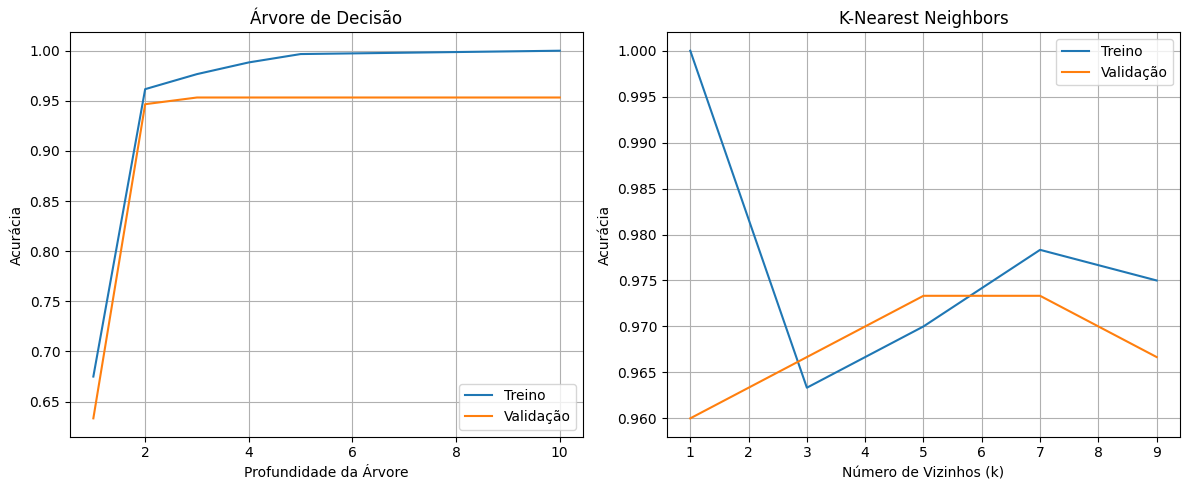

(DecisionTreeClassifier(max_depth=4, random_state=42),
 4,
 KNeighborsClassifier(),
 5)

In [12]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Hiperparâmetros
max_depths = [1, 2, 3, 4, 5, 10]
k_neighbors = [1, 3, 5, 7, 9]

# Resultados
dt_results = {"depth": [], "train_acc": [], "val_acc": []}
knn_results = {"k": [], "train_acc": [], "val_acc": []}

melhor_dt_acc = 0
melhor_dt_model = None
melhor_dt_param = None

melhor_knn_acc = 0
melhor_knn_model = None
melhor_knn_param = None

# Árvore de Decisão
for depth in max_depths:
    train_acc = []
    val_acc = []
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        model.fit(X_train, y_train)

        train_acc.append(accuracy_score(y_train, model.predict(X_train)))
        val_acc.append(accuracy_score(y_val, model.predict(X_val)))

    avg_train = np.mean(train_acc)
    avg_val = np.mean(val_acc)

    dt_results["depth"].append(depth)
    dt_results["train_acc"].append(avg_train)
    dt_results["val_acc"].append(avg_val)

    if avg_val > melhor_dt_acc:
        melhor_dt_acc = avg_val
        melhor_dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        melhor_dt_model.fit(X_train, y_train)
        melhor_dt_param = depth

# KNN
for k in k_neighbors:
    train_acc = []
    val_acc = []
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)

        train_acc.append(accuracy_score(y_train, model.predict(X_train)))
        val_acc.append(accuracy_score(y_val, model.predict(X_val)))

    avg_train = np.mean(train_acc)
    avg_val = np.mean(val_acc)

    knn_results["k"].append(k)
    knn_results["train_acc"].append(avg_train)
    knn_results["val_acc"].append(avg_val)

    if avg_val > melhor_knn_acc:
        melhor_knn_acc = avg_val
        melhor_knn_model = KNeighborsClassifier(n_neighbors=k)
        melhor_knn_model.fit(X_train, y_train)
        melhor_knn_param = k

# Plotagem dos resultados
plt.figure(figsize=(12, 5))

# Árvore de Decisão
plt.subplot(1, 2, 1)
plt.plot(dt_results["depth"], dt_results["train_acc"], label="Treino")
plt.plot(dt_results["depth"], dt_results["val_acc"], label="Validação")
plt.xlabel("Profundidade da Árvore")
plt.ylabel("Acurácia")
plt.title("Árvore de Decisão")
plt.legend()
plt.grid(True)

# KNN
plt.subplot(1, 2, 2)
plt.plot(knn_results["k"], knn_results["train_acc"], label="Treino")
plt.plot(knn_results["k"], knn_results["val_acc"], label="Validação")
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("Acurácia")
plt.title("K-Nearest Neighbors")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

melhor_dt_model, melhor_dt_param, melhor_knn_model, melhor_knn_param

4. Sumarize os seus resultados. Qual modelo que você utilizou obteve o melhor resultado? Para isso, escolha os melhores modelos obtidos através da validação cruzada e avalie eles utilizando o conjunto de teste. O resultado condiz com as suas expectativas?

In [13]:
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# Naive Bayes
y_pred_nb = modeloNB.predict(X_test)
nb_report = classification_report(y_test, y_pred_nb, output_dict=True)
nb_acc = nb_report['accuracy']

# Decision Tree
y_pred_dt = melhor_dt_model.predict(X_test)
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)
dt_acc = dt_report['accuracy']

# KNN
y_pred_knn = melhor_knn_model.predict(X_test)
knn_report = classification_report(y_test, y_pred_knn, output_dict=True)
knn_acc = knn_report['accuracy']

# Comparar em DataFrame
import pandas as pd
comparacao_final = pd.DataFrame({
    "Modelo": ["Naive Bayes", "Decision Tree", "KNN"],
    "Acurácia": [nb_acc, dt_acc, knn_acc],
    "Precisão Média": [nb_report["macro avg"]["precision"], dt_report["macro avg"]["precision"], knn_report["macro avg"]["precision"]],
    "Revocação Média": [nb_report["macro avg"]["recall"], dt_report["macro avg"]["recall"], knn_report["macro avg"]["recall"]],
    "F1-score Médio": [nb_report["macro avg"]["f1-score"], dt_report["macro avg"]["f1-score"], knn_report["macro avg"]["f1-score"]]
})

print(comparacao_final)

#Sim, o resultado condiz com as expectativas, principalmente considerando o contexto do dataset Iris:
#O dataset é pequeno, bem balanceado e tem separações de classe claras.Modelos simples e não-paramétricos como KNN e árvores de decisão
#geralmente se saem muito bem nesse tipo de dado.


          Modelo  Acurácia  Precisão Média  Revocação Média  F1-score Médio
0    Naive Bayes  0.933333        0.944444         0.933333         0.93266
1  Decision Tree  1.000000        1.000000         1.000000         1.00000
2            KNN  1.000000        1.000000         1.000000         1.00000


5. **Extra:** Ainda utilizando o conjunto de teste, para enriquecer os seus resultados, plote uma matriz de confusão para cada modelo.

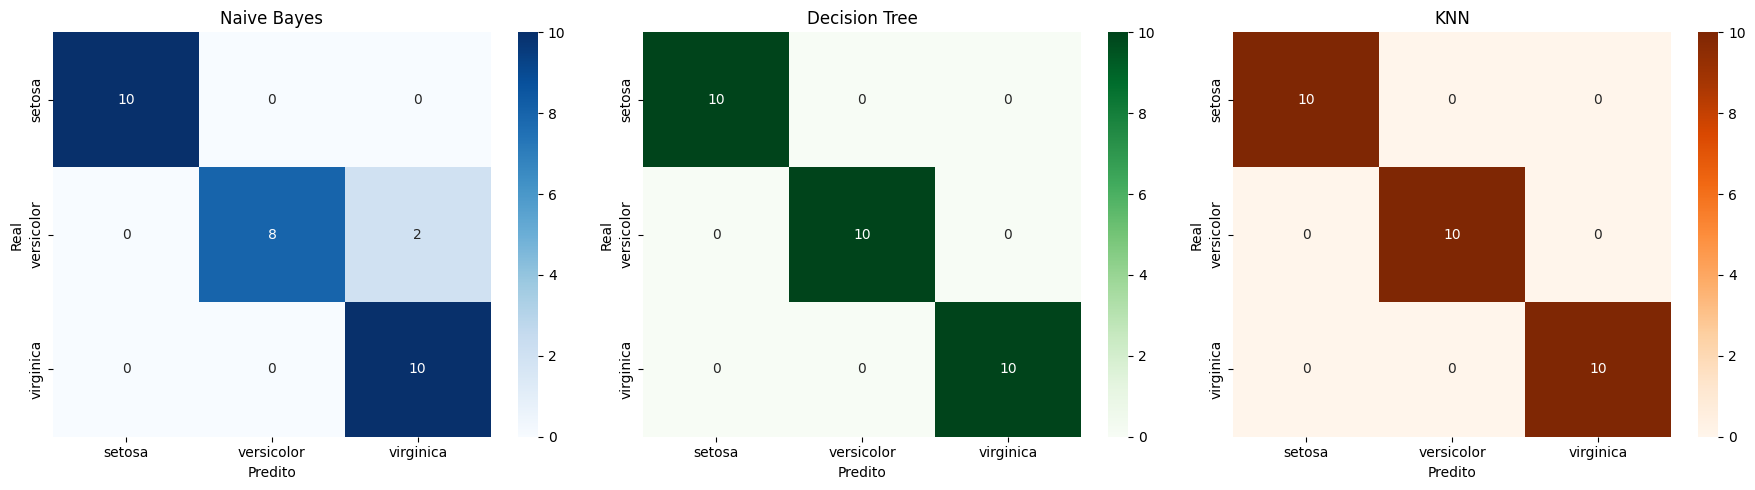

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obter os nomes das classes
class_names = load_iris().target_names

# Calcular as matrizes de confusão
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Criar subplots com seaborn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Naive Bayes
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Naive Bayes")
axes[0].set_xlabel("Predito")
axes[0].set_ylabel("Real")

# Decision Tree
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title("Decision Tree")
axes[1].set_xlabel("Predito")
axes[1].set_ylabel("Real")

# KNN
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names, ax=axes[2])
axes[2].set_title("KNN")
axes[2].set_xlabel("Predito")
axes[2].set_ylabel("Real")

plt.tight_layout()
plt.show()


## 4. Conjunto de Exercícios - Tarefa de Regressão (desafio)

- Agora é com você! Repita os mesmos passos definidos para a tarefa de classificação sobre os dados da tarefa de regressão (base de dados de diabetes). Fique atento às nuâncias que existem entre os dois tipos de problemas, principalmente aos modelos que irá utilizar e as métricas! Sinta-se livre para explorar outros *pipelines*, preprocessamentos, e até mesmo uma outra base de dados! A ideia deste exercício é fazer com que você coloque a mão na massa por conta própria, enfrentando os problemas que encontrar ao longo do caminho.

In [15]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
X, y = load_diabetes(return_X_y=True, as_frame=True)

In [16]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [17]:
y.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [18]:
from sklearn.model_selection import train_test_split

# Convertendo os valores para matrizes e vetores numpy
X = X.values
y = y.values

# Implemente a sua solução aqui
X_train, X_teste, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


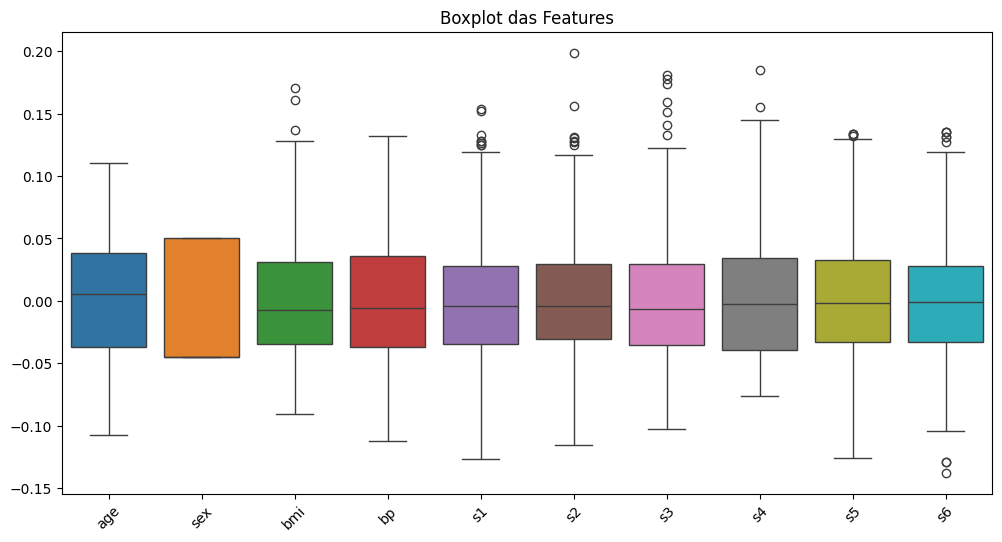

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[data.feature_names])
plt.xticks(rotation=45)
plt.title("Boxplot das Features")
plt.show()


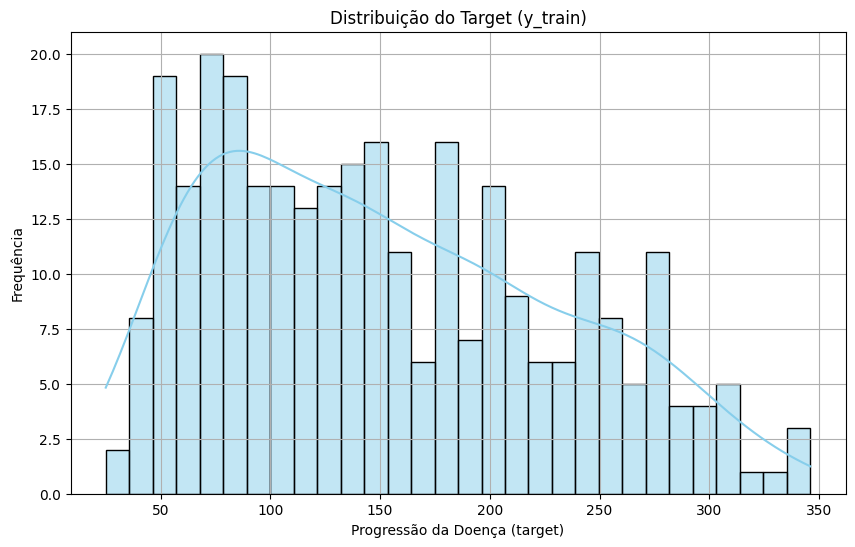

In [20]:
# Visualizando a distribuição do y (target) no conjunto de treino
plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=30, kde=True, color='skyblue')
plt.title('Distribuição do Target (y_train)')
plt.xlabel('Progressão da Doença (target)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [21]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [22]:
##Kf.split divide a base de treino em 5 folds
## train_index contém os índices dos datapoints de treino que serão usados em um determinado fold
## train validation_index contém os índices dos datapoints de treino que serão usados em um determinado fold

for i, (train_index, validation_index) in enumerate(kf.split(X_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Validation:  index={validation_index}")

Fold 0:
  Train: index=[  0   1   2   3   4   7   8  10  11  12  13  14  15  16  17  18  19  20
  21  23  26  27  28  29  31  32  34  35  36  37  38  39  40  41  43  44
  47  48  49  50  51  52  53  54  55  57  58  61  62  63  64  65  66  67
  68  69  70  71  72  74  75  76  78  79  80  81  83  85  86  87  88  89
  90  91  94  95  96  98  99 100 101 102 103 104 105 106 107 108 109 110
 112 114 115 116 117 118 120 121 122 123 125 126 127 128 129 130 131 133
 134 135 136 137 138 139 141 142 145 146 147 149 150 151 153 154 156 157
 158 159 160 161 162 163 165 166 168 169 171 172 173 174 176 178 180 181
 183 184 185 187 188 189 190 191 192 194 195 196 198 199 200 201 203 205
 206 207 208 209 210 212 213 214 215 217 219 220 221 223 224 225 227 229
 230 231 232 233 234 235 237 239 240 241 242 243 244 246 247 248 249 250
 252 253 254 255 256 257 258 259 260 263 264 265 266 267 268 269 270 271
 272 273 275 276 278 279 280 281 283 284 286 287 288 289 290 291 292 293
 294 295]
  Validation:  ind

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [24]:
mse_list = []
mae_list = []
r2_list = []
modelos_treinados = []

for i, (train_index, validation_index) in enumerate(kf.split(X_train)):
    print(f"Fold {i}:")
    print(validation_index)

    X_train_fold, X_validation_fold = X_train[train_index], X_train[validation_index]
    y_train_fold, y_validation_fold = y_train[train_index], y_train[validation_index]

    modelo = LinearRegression()
    modelo.fit(X_train_fold, y_train_fold)
    y_pred = modelo.predict(X_validation_fold)

    mse_list.append(mean_squared_error(y_validation_fold, y_pred))
    mae_list.append(mean_absolute_error(y_validation_fold, y_pred))
    r2_list.append(r2_score(y_validation_fold, y_pred))
    modelos_treinados.append(modelo)

    print(f'mean squared error: {mse_list[-1]}')
    print(f'mean absolute error: {mae_list[-1]}')
    print(f'r2 score: {r2_list[-1]}')
    print('\n')

# Resultados médios
media_mse = sum(mse_list) / len(mse_list)
media_mae = sum(mae_list) / len(mae_list)
media_r2 = sum(r2_list) / len(r2_list)

print("Médias Finais")
print(f"  mean squared error: {media_mse}")
print(f"  mean absolute error: {media_mae}")
print(f"  r2 score: {media_r2}")

# Selecionar o melhor modelo
melhor_indice = np.argmin(mse_list)
modeloRegression = modelos_treinados[melhor_indice]
modeloRegression

Fold 0:
[  5   6   9  22  24  25  30  33  42  45  46  56  59  60  73  77  82  84
  92  93  97 111 113 119 124 132 140 143 144 148 152 155 164 167 170 175
 177 179 182 186 193 197 202 204 211 216 218 222 226 228 236 238 245 251
 261 262 274 277 282 285]
mean squared error: 2553.4058579462876
mean absolute error: 40.37539324173054
r2 score: 0.3611762939612906


Fold 1:
[ 10  15  16  17  18  19  37  38  55  57  63  66  67  68  69  72  75  76
  79  86  90  96 101 104 108 109 112 114 116 118 125 126 129 137 139 146
 154 158 165 172 173 176 178 183 185 196 215 219 221 237 242 246 250 266
 278 280 284 288 293]
mean squared error: 3348.0119417183214
mean absolute error: 47.345900361521956
r2 score: 0.5131265676746055


Fold 2:
[  0   2  12  26  28  29  31  35  41  51  65  74  78  83  85  89  95 100
 107 115 117 120 127 136 141 142 147 157 159 168 180 181 184 195 200 203
 206 208 210 213 230 232 233 234 239 244 249 253 256 258 264 265 267 272
 273 275 279 289 291]
mean squared error: 3674.43302

LinearRegression()

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import numpy as np

# Listas específicas para Decision Tree
dt_mse_list = []
dt_mae_list = []
dt_r2_list = []
dt_modelos_treinados = []

# Validação cruzada
kf_dt = KFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_idx_dt, val_idx_dt) in enumerate(kf_dt.split(X_train)):
    print(f"Fold {i}:")
    print(val_idx_dt)

    X_train_fold_dt, X_val_fold_dt = X_train[train_idx_dt], X_train[val_idx_dt]
    y_train_fold_dt, y_val_fold_dt = y_train[train_idx_dt], y_train[val_idx_dt]

    modelo_dt = DecisionTreeRegressor(max_depth=4)
    modelo_dt.fit(X_train_fold_dt, y_train_fold_dt)
    y_pred_dt = modelo_dt.predict(X_val_fold_dt)

    dt_mse_list.append(mean_squared_error(y_val_fold_dt, y_pred_dt))
    dt_mae_list.append(mean_absolute_error(y_val_fold_dt, y_pred_dt))
    dt_r2_list.append(r2_score(y_val_fold_dt, y_pred_dt))
    dt_modelos_treinados.append(modelo_dt)

    print(f'mean squared error: {dt_mse_list[-1]}')
    print(f'mean absolute error: {dt_mae_list[-1]}')
    print(f'r2 score: {dt_r2_list[-1]}')
    print('\n')

# Resultados médios
media_mse_dt = np.mean(dt_mse_list)
media_mae_dt = np.mean(dt_mae_list)
media_r2_dt = np.mean(dt_r2_list)

print("Médias Finais (DecisionTreeRegressor)")
print(f"  mean squared error: {media_mse_dt}")
print(f"  mean absolute error: {media_mae_dt}")
print(f"  r2 score: {media_r2_dt}")

# Selecionar o melhor modelo da árvore
melhor_indice_dt = np.argmin(dt_mse_list)
modeloRegression_dt = dt_modelos_treinados[melhor_indice_dt]
modeloRegression_dt


Fold 0:
[  5   6   9  22  24  25  30  33  42  45  46  56  59  60  73  77  82  84
  92  93  97 111 113 119 124 132 140 143 144 148 152 155 164 167 170 175
 177 179 182 186 193 197 202 204 211 216 218 222 226 228 236 238 245 251
 261 262 274 277 282 285]
mean squared error: 3014.9722948371104
mean absolute error: 44.36910670686625
r2 score: 0.24569931998942307


Fold 1:
[ 10  15  16  17  18  19  37  38  55  57  63  66  67  68  69  72  75  76
  79  86  90  96 101 104 108 109 112 114 116 118 125 126 129 137 139 146
 154 158 165 172 173 176 178 183 185 196 215 219 221 237 242 246 250 266
 278 280 284 288 293]
mean squared error: 4941.73985048496
mean absolute error: 56.21999451351407
r2 score: 0.28136402003693384


Fold 2:
[  0   2  12  26  28  29  31  35  41  51  65  74  78  83  85  89  95 100
 107 115 117 120 127 136 141 142 147 157 159 168 180 181 184 195 200 203
 206 208 210 213 230 232 233 234 239 244 249 253 256 258 264 265 267 272
 273 275 279 289 291]
mean squared error: 4939.810992

DecisionTreeRegressor(max_depth=4)

In [26]:
import pandas as pd

# Montar tabela com os valores médios das métricas
df_summary = pd.DataFrame({
    "Modelo": ["Linear Regression", "Decision Tree Regressor"],
    "MSE": [media_mse, media_mse_dt],
    "MAE": [media_mae, media_mae_dt],
    "R²": [media_r2, media_r2_dt]
})

print(df_summary)


                    Modelo          MSE        MAE        R²
0        Linear Regression  3271.013531  46.453057  0.420281
1  Decision Tree Regressor  4378.542565  52.690933  0.226779
